In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv('C:\\Users\\abhij\\Desktop\\new_dataset.csv', sep=',', encoding='ISO-8859-1', header=0)

In [7]:
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,09-06-2014,14-06-2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
data['Customer ID'] = data['Customer ID'].astype(str)

In [10]:
data_null_values = round(100*(data.isnull().sum())/len(data),2)
data_null_values

Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64

In [11]:
# data['TotalAmount'] = data['Quantity']*data['PriceperUnit']
rfm_m = data.groupby('Customer ID')['Sales'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,Customer ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [12]:
rfm_f = data.groupby('Customer ID')['Order ID'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['Customer ID','Frequency']
rfm_f.head()

,Customer ID,Frequency
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6


In [13]:
rfm = pd.merge(rfm_m, rfm_f, on='Customer ID', how='inner')
rfm.head()

,Customer ID,Sales,Frequency
0,AA-10315,5563.560,11
1,AA-10375,1056.390,15
2,AA-10480,1790.512,12
3,AA-10645,5086.935,18
4,AB-10015,886.156,6


In [14]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format = '%d-%m-%Y')

In [15]:
maxdate = max(data['Order Date'])
maxdate

Timestamp('2017-12-30 00:00:00')

In [16]:
maxsales = max(data['Sales'])
maxsales

22638.48

In [17]:
data['Difference_Date'] = maxdate - data['Order Date']
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Difference_Date
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,417 days
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,417 days
2,3,CA-2016-138688,2016-06-12,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,566 days
3,4,US-2015-108966,2015-10-11,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,811 days
4,5,US-2015-108966,2015-10-11,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,811 days


In [18]:
rfm_p = data.groupby('Customer ID')['Difference_Date'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,Customer ID,Difference_Date
0,AA-10315,184 days
1,AA-10375,19 days
2,AA-10480,259 days
3,AA-10645,55 days
4,AB-10015,415 days


In [19]:
rfm_p['Difference_Date'] = rfm_p['Difference_Date'].dt.days
rfm_p.head()

,Customer ID,Difference_Date
0,AA-10315,184
1,AA-10375,19
2,AA-10480,259
3,AA-10645,55
4,AB-10015,415


In [20]:
rfm = pd.merge(rfm, rfm_p, on='Customer ID', how='inner')
rfm.columns = ['Customer ID','Sales','Frequency','Recency']
rfm.head()

,Customer ID,Sales,Frequency,Recency
0,AA-10315,5563.560,11,184
1,AA-10375,1056.390,15,19
2,AA-10480,1790.512,12,259
3,AA-10645,5086.935,18,55
4,AB-10015,886.156,6,415


Text(0.5, 0, 'Attributes')

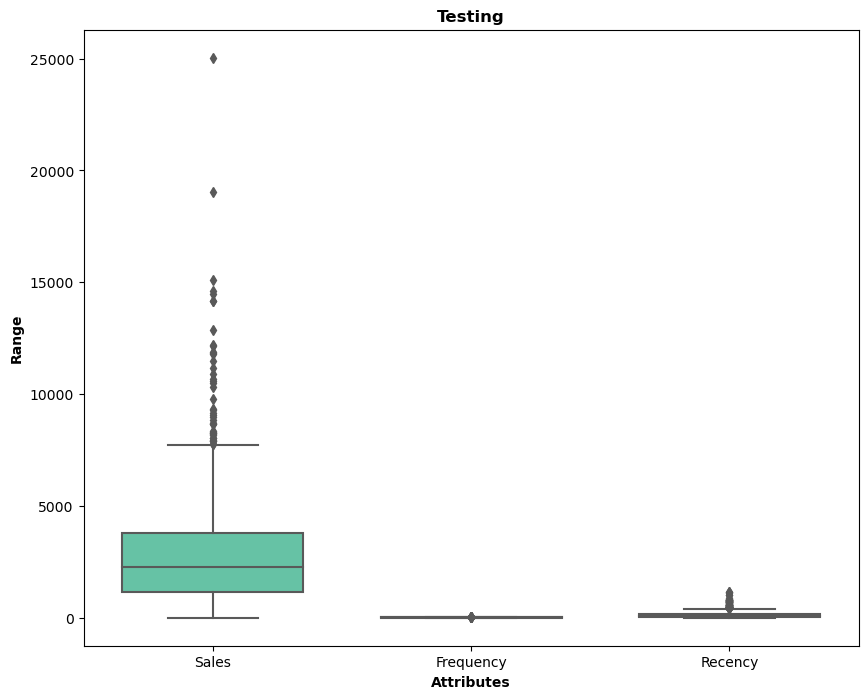

In [21]:
attributes = ['Sales','Frequency','Recency']
plot.rcParams['figure.figsize'] = [10,8]
sb.boxplot(data = rfm[attributes], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plot.title("Testing",fontweight='bold')
plot.ylabel("Range",fontweight='bold')
plot.xlabel("Attributes",fontweight='bold')
# plot.ylim(0, 30000)

In [22]:
q1 = rfm.Sales.quantile(0.05)
q3 = rfm.Sales.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Sales >= q1 - 1.5*iqr) & (rfm.Sales <= q3 + 1.5*iqr)]

q1 = rfm.Recency.quantile(0.05)
q3 = rfm.Recency.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Recency >= q1 - 1.5*iqr) & (rfm.Recency <= q3 + 1.5*iqr)]

q1 = rfm.Frequency.quantile(0.05)
q3 = rfm.Frequency.quantile(0.95)
iqr = q3 - q1
rfm = rfm[(rfm.Frequency >= q1 - 1.5*iqr) & (rfm.Frequency <= q3 + 1.5*iqr)]

In [23]:
rfm_df = rfm[['Sales','Frequency','Recency']]

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(792, 3)

In [24]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Sales','Frequency','Recency']

In [25]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

C:\Users\abhij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

In [26]:
kmeans.labels_

array([0, 1, 1, 0, 2, 3, 3, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 3, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 3,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1,
       3, 0, 3, 1, 3, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 3, 0, 1, 2, 0, 1,
       2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 3, 1, 0, 2, 1, 0, 3,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 2, 3, 0, 1, 0, 1, 1, 3, 1,
       1, 2, 1, 1, 1, 2, 3, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 0,
       0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 3, 0, 2, 1, 1, 1, 0, 0, 2, 0, 3, 3, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 3, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 0, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 3, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2,

In [27]:
set(kmeans.labels_)

{0, 1, 2, 3}

C:\Users\abhij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\abhij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

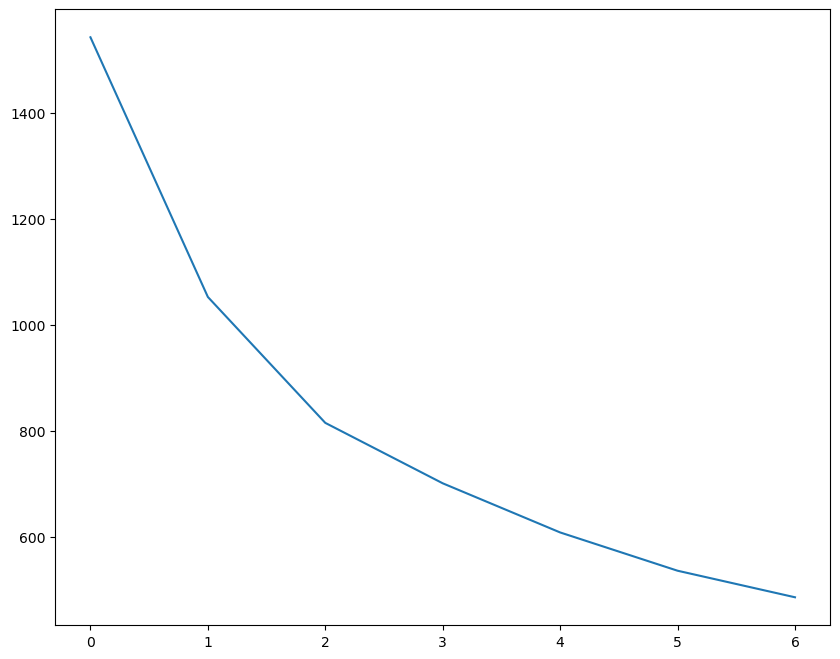

In [28]:
ssd = []
range_n = [2,3,4,5,6,7,8]
for num_clusters in range_n:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
plot.plot(ssd)

In [29]:
kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(rfm_df_scaled)

C:\Users\abhij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [30]:
rfm['Cluster ID'] = kmeans.predict(rfm_df_scaled)
rfm.head()

,Customer ID,Sales,Frequency,Recency,Cluster ID
0,AA-10315,5563.560,11,184,0
1,AA-10375,1056.390,15,19,2
2,AA-10480,1790.512,12,259,2
3,AA-10645,5086.935,18,55,0
4,AB-10015,886.156,6,415,1


<Axes: xlabel='Cluster ID', ylabel='Sales'>

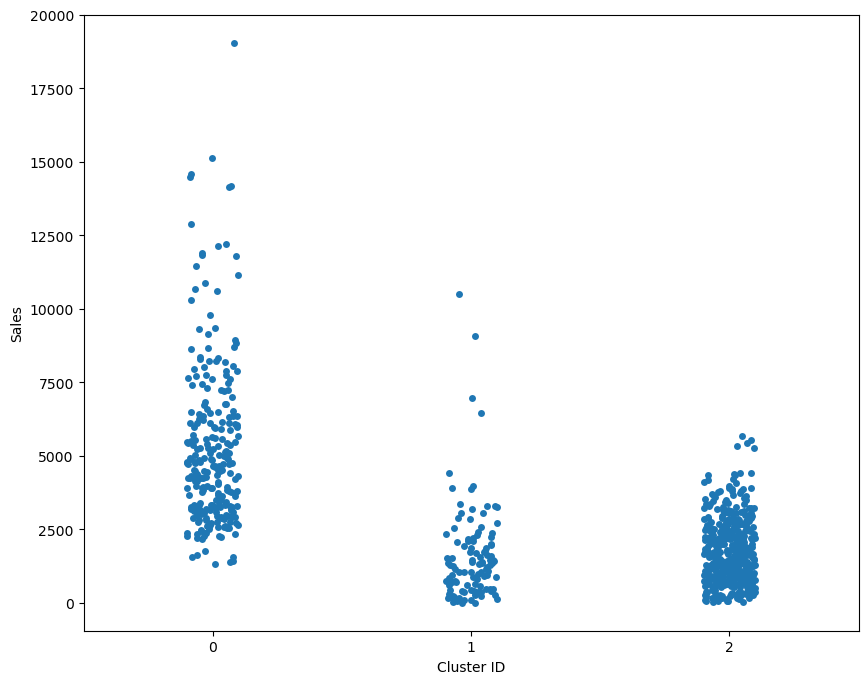

In [31]:
sb.stripplot(x='Cluster ID', y='Sales', data=rfm)

In [32]:
cluster_1_data = rfm[rfm['Cluster ID'] == 1]
# cluster_1_data.head()
# Assuming 'original_data' contains the 'ShipMode' column and 'CustomerID' column
# Merge 'original_data' with 'cluster_1_data' on 'CustomerID'
cluster_1_data_with_category = pd.merge(cluster_1_data, data[['Customer ID','Category']], on='Customer ID', how='left')

# Display the head of the merged DataFrame
cluster_1_data_with_category.head()


,Customer ID,Sales,Frequency,Recency,Cluster ID,Category
0,AB-10015,886.156,6,415,1,Furniture
1,AB-10015,886.156,6,415,1,Office Supplies
2,AB-10015,886.156,6,415,1,Office Supplies
3,AB-10015,886.156,6,415,1,Office Supplies
4,AB-10015,886.156,6,415,1,Technology


In [33]:
category_counts = cluster_1_data_with_category['Category'].value_counts()

# Display the counts for each ship mode
category_counts

Category
Office Supplies    529
Furniture          186
Technology         148
Name: count, dtype: int64

<Axes: xlabel='Cluster ID', ylabel='Frequency'>

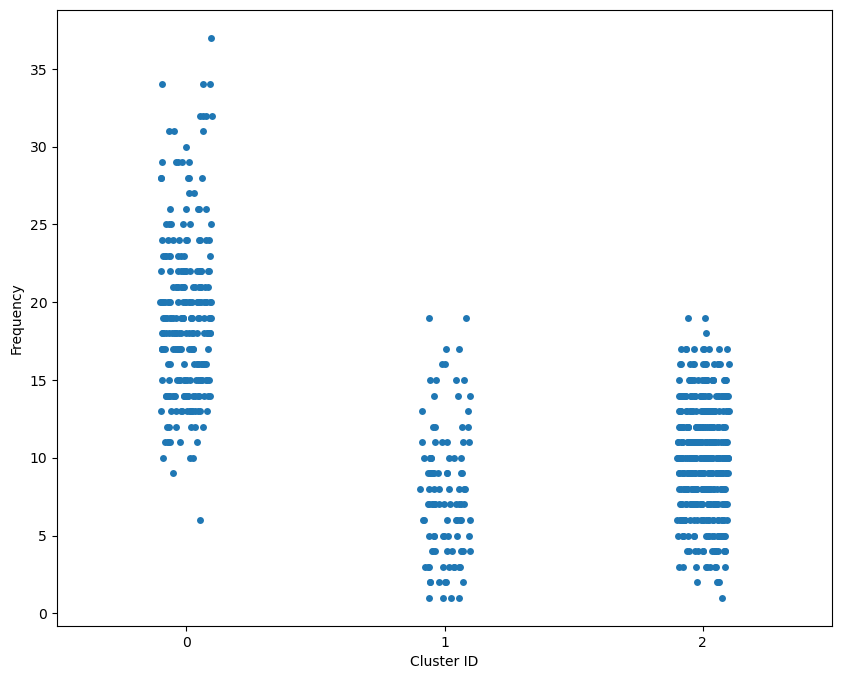

In [34]:
sb.stripplot(x='Cluster ID', y='Frequency', data=rfm)

In [35]:
cluster_1_data = rfm[rfm['Cluster ID'] == 1]
# cluster_1_data.head()
# Assuming 'original_data' contains the 'ShipMode' column and 'CustomerID' column
# Merge 'original_data' with 'cluster_1_data' on 'CustomerID'
cluster_1_data_with_category = pd.merge(cluster_1_data, data[['Customer ID','Category']], on='Customer ID', how='left')

# Display the head of the merged DataFrame
cluster_1_data_with_category.head()

,Customer ID,Sales,Frequency,Recency,Cluster ID,Category
0,AB-10015,886.156,6,415,1,Furniture
1,AB-10015,886.156,6,415,1,Office Supplies
2,AB-10015,886.156,6,415,1,Office Supplies
3,AB-10015,886.156,6,415,1,Office Supplies
4,AB-10015,886.156,6,415,1,Technology


In [36]:
# Group the data by 'Frequency' and 'Category' and calculate the counts
category_counts = cluster_1_data_with_category.groupby(['Frequency', 'Category']).size()

# Display the counts for each frequency and category
category_counts.head

<bound method NDFrame.head of Frequency  Category       
1          Furniture           1
           Office Supplies     3
2          Furniture           5
           Office Supplies     6
           Technology          1
3          Furniture           5
           Office Supplies    17
           Technology          5
4          Furniture           8
           Office Supplies    20
           Technology          8
5          Furniture          15
           Office Supplies    22
           Technology          3
6          Furniture          10
           Office Supplies    30
           Technology          8
7          Furniture          20
           Office Supplies    63
           Technology         15
8          Furniture          13
           Office Supplies    42
           Technology          9
9          Furniture          24
           Office Supplies    63
           Technology         21
10         Furniture          15
           Office Supplies    51
           Technolo

In [37]:
category_counts = cluster_1_data_with_category.groupby('Cluster ID')['Frequency'].value_counts()

<Axes: xlabel='Cluster ID', ylabel='Recency'>

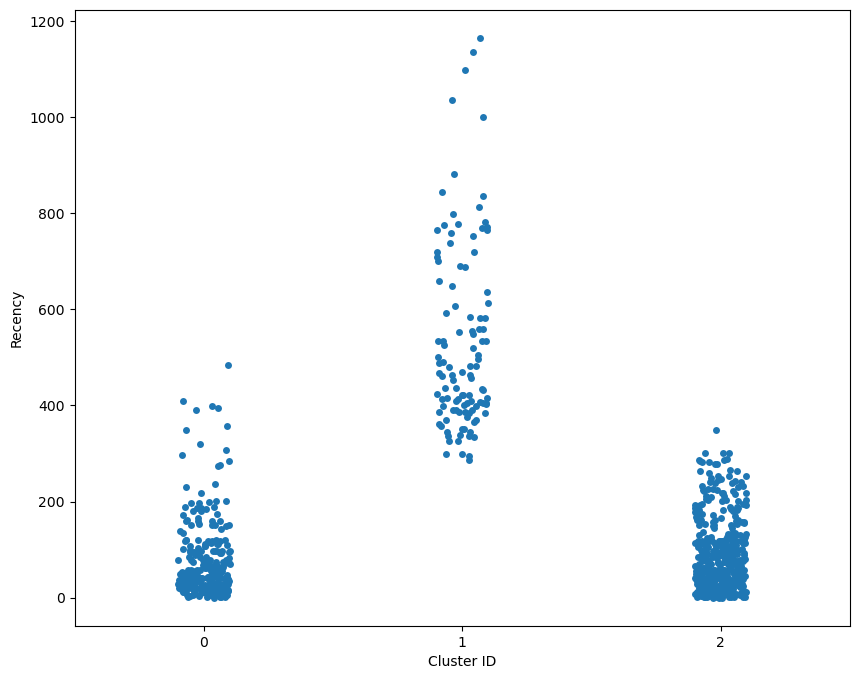

In [38]:
sb.stripplot(x='Cluster ID', y='Recency', data=rfm)

In [39]:
cluster_1_data = rfm[rfm['Cluster ID'] == 0]
# cluster_1_data.head()
# Assuming 'original_data' contains the 'ShipMode' column and 'CustomerID' column
# Merge 'original_data' with 'cluster_1_data' on 'CustomerID'
cluster_1_data_with_category = pd.merge(cluster_1_data, data[['Customer ID','Category']], on='Customer ID', how='left')

# Display the head of the merged DataFrame
cluster_1_data_with_category.head()

,Customer ID,Sales,Frequency,Recency,Cluster ID,Category
0,AA-10315,5563.56,11,184,0,Office Supplies
1,AA-10315,5563.56,11,184,0,Office Supplies
2,AA-10315,5563.56,11,184,0,Office Supplies
3,AA-10315,5563.56,11,184,0,Office Supplies
4,AA-10315,5563.56,11,184,0,Office Supplies


In [44]:
# Group the data by 'Frequency' and 'Category' and calculate the counts
category_counts = cluster_1_data_with_category.groupby(['Recency', 'Category']).size()

# Display the counts for each frequency and category
category_counts.head

<bound method NDFrame.head of Recency  Category       
0        Furniture           5
         Office Supplies    10
         Technology          4
1        Furniture          13
         Office Supplies    27
                            ..
410      Office Supplies    11
         Technology          5
484      Furniture           2
         Office Supplies    10
         Technology          4
Length: 375, dtype: int64>